<a href="https://colab.research.google.com/github/bbhavii/Project-Work/blob/main/KNN_%26_DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

KNN Algorithm:

Step 1 − For implementing any algorithm, we need dataset. So during the first step of KNN, we must load the training as well as test data.

 1.1 - Normalize the data points. Divide them into training and test dataset 

Step 2 − Next, we need to choose the value of K i.e. the nearest data points. K can be any integer.

Step 3 − For each point in the test data do the following −

3.1 − Calculate the distance between test data and each row of training data with the help of any of the method namely: Euclidean, Manhattan or Hamming distance. The most commonly used method to calculate distance is Euclidean.

3.2 − Now, based on the distance value, sort them in ascending order.

3.3 − Next, it will choose the top K rows from the sorted array.

3.4 − Now, it will assign a class to the test point based on most frequent class of these rows.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import seaborn as sns

In [ ]:
path = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
headernames = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
dataset = pd.read_csv(path, names = headernames)
dataset.head(n=100)

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,Iris-versicolor
96,5.7,2.9,4.2,1.3,Iris-versicolor
97,6.2,2.9,4.3,1.3,Iris-versicolor
98,5.1,2.5,3.0,1.1,Iris-versicolor


In [ ]:
from sklearn.model_selection import train_test_split

x = dataset.iloc[:, [1,3]].values #column 1 (sepal length) and 3 (petal length) are our 2 dimensions/features 
y = dataset.iloc[:, 4].values

#normalizing testing and training dataset 
col1 = x[:, 0]
col1_min = min(col1)
col1_max = max(col1)
col2 = x[:, 1]
col2_min = min(col2)
col2_max = max(col2)

range_col1 = col1_max - col1_min
range_col2 = col2_max - col2_min

norm_x = [] #storing normalized data

for i in range(len(col1)):
  norm_x.append([(x[i][0]-col1_min)/(range_col1), (x[i][1]-col2_min)/(range_col2)])


#splitting data set such that 30% is attributed to test whereas 70% is attributed to training.
x_train, x_test, y_train, y_test = train_test_split(norm_x, y, test_size = 0.30)  


 Defining k can be a balancing act as different values can lead to overfitting or underfitting. Lower values of k can have high variance, but low bias, and larger values of k may lead to high bias and lower variance. The choice of k will largely depend on the input data as data with more outliers or noise will likely perform better with higher values of k. Overall, it is recommended to have an odd number for k to avoid ties in classification, and cross-validation tactics can help you choose the optimal k for your dataset.

Now, let's begin the main body of KNN Algorithm. 

In [ ]:
# finding Euclidean Distance 
def EucledianDist(x, y): 
  euc_dist = (math.sqrt(pow((x[0]-y[0]),2) + pow((x[1]-y[1]),2)))
  return euc_dist


#find most common element in kClassifications
def most_common(List):
  counter = 0
  classification = List[0]
     
  for i in List:
      curr_frequency = List.count(i)
      if(curr_frequency> counter):
          counter = curr_frequency
          classification = i
 
  return classification

In [ ]:
k = 7 #defining k. recommended to be an odd number. 
EucledianDistanceList = [] # storing all eucledian distances
kNeighbours = []
kClassifications = []

for train in range(len(x_train)):
  for test in range(len(x_test)):
    eucledianDistance = EucledianDist(x_train[train], x_test[test])
    EucledianDistanceList.append([eucledianDistance, y_test[test]])
    EucledianDistanceList.sort()

  kNeighbours = EucledianDistanceList[:k] # list with first k shortest distances from the training datapoint. 
  for n in range(len(kNeighbours)):
    kClassifications.append(kNeighbours[n][1])
  training_set_classification = most_common(kClassifications)
  print('training data:', x_train[train], 'classification:', training_set_classification) # training data classified based on k nearest test datapoints
  
  kNeighbours = []
  EucledianDistanceList= []
  kClassifications = []



training data: [0.7499999999999998, 0.8750000000000001] classification: Iris-virginica
training data: [0.4583333333333333, 0.5833333333333334] classification: Iris-versicolor
training data: [0.41666666666666663, 0.0] classification: Iris-setosa
training data: [0.5416666666666665, 1.0] classification: Iris-virginica
training data: [0.4583333333333333, 0.0] classification: Iris-setosa
training data: [0.3749999999999999, 0.5833333333333334] classification: Iris-versicolor
training data: [0.5833333333333333, 0.08333333333333333] classification: Iris-setosa
training data: [0.5833333333333333, 0.625] classification: Iris-versicolor
training data: [0.41666666666666663, 0.625] classification: Iris-versicolor
training data: [0.41666666666666663, 0.4583333333333333] classification: Iris-versicolor
training data: [0.3333333333333332, 0.7916666666666666] classification: Iris-virginica
training data: [0.6666666666666666, 0.04166666666666667] classification: Iris-setosa
training data: [0.20833333333

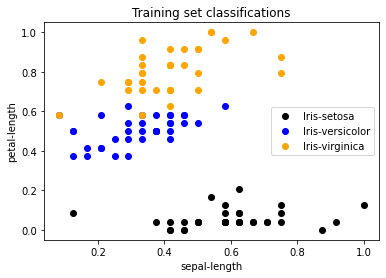

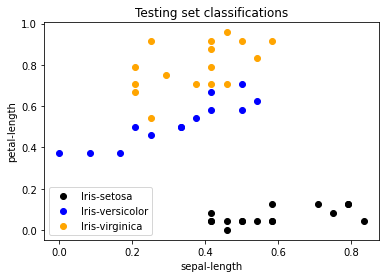

In [ ]:

x_train_df = pd.DataFrame(x_train,columns=['x','y'])
x_train_df['class'] = y_train


x_test_df = pd.DataFrame(x_test,columns=['x','y'])
x_test_df['class'] = y_test

plt.scatter(x_train_df.loc[(x_train_df['class']=='Iris-setosa')]['x'],
            x_train_df.loc[(x_train_df['class']=='Iris-setosa')]['y'],color='black',label='Iris-setosa');
plt.scatter(x_train_df.loc[(x_train_df['class']=='Iris-versicolor')]['x'],
            x_train_df.loc[(x_train_df['class']=='Iris-versicolor')]['y'],color='blue',label='Iris-versicolor');
plt.scatter(x_train_df.loc[(x_train_df['class']=='Iris-virginica')]['x'],
            x_train_df.loc[(x_train_df['class']=='Iris-virginica')]['y'],color='orange',label='Iris-virginica');
plt.legend()
plt.xlabel("sepal-length")
plt.ylabel("petal-length")
plt.title("Training set classifications")
plt.show();

plt.scatter(x_test_df.loc[(x_test_df['class']=='Iris-setosa')]['x'],
            x_test_df.loc[(x_test_df['class']=='Iris-setosa')]['y'],color='black',label='Iris-setosa');
plt.scatter(x_test_df.loc[(x_test_df['class']=='Iris-versicolor')]['x'],
            x_test_df.loc[(x_test_df['class']=='Iris-versicolor')]['y'],color='blue',label='Iris-versicolor');
plt.scatter(x_test_df.loc[(x_test_df['class']=='Iris-virginica')]['x'],
            x_test_df.loc[(x_test_df['class']=='Iris-virginica')]['y'],color='orange',label='Iris-virginica');
plt.legend()
plt.xlabel("sepal-length")
plt.ylabel("petal-length")
plt.title("Testing set classifications");

Decision Tree

1. For decision trees, you need to start with the root node with all the data.

2. You then decide a Attribute Selection Measure, in our case, Gini Index, and impurity.

3. You then split based on that attribute and continue splitting until the purity of the leaf nodes of the tree is significantly changing

4. When the purity cannot get better, you stop

5. You can choose to prune the tree to prevent overfitting 

In [ ]:
dataset.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Seeing the correlation in the columns of our data.

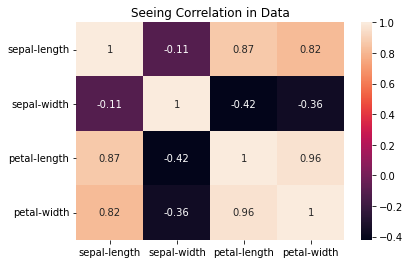

In [ ]:
plt.title("Seeing Correlation in Data")
sns.heatmap(dataset.corr(),annot=True);

Creating a code for gini index to find the best split and impurity in each column given the name.

In [ ]:

def gini(column1,dataset,column2):
  prob1 = len(dataset.loc[dataset[column2]=='Iris-setosa'])/len(dataset[column2])
  prob2 = len(dataset.loc[dataset[column2]=='Iris-versicolor'])/len(dataset[column2])
  prob3 = len(dataset.loc[dataset[column2]=='Iris-virginica'])/len(dataset[column2])
  index = 1 - prob1**2 - prob2**2 -prob3**2
  return index


In [ ]:
def impurity(column1, dataset, column2,limit):
  
  gln1 = len(dataset.loc[(dataset[column1]>limit)])
  gln2 = len(dataset.loc[(dataset[column1]<=limit)])
  gl1 = len(dataset.loc[(dataset[column1]>limit) & (dataset[column2]=='Iris-setosa')])
  gl2 = len(dataset.loc[(dataset[column1]>limit) & (dataset[column2]=='Iris-versicolor')])
  gl3 = len(dataset.loc[(dataset[column1]>limit) & (dataset[column2]=='Iris-virginica')])
  ll1 = len(dataset.loc[(dataset[column1]<=limit) & (dataset[column2]=='Iris-setosa')])
  ll2 = len(dataset.loc[(dataset[column1]<=limit) & (dataset[column2]=='Iris-versicolor')])
  ll3 = len(dataset.loc[(dataset[column1]<=limit) & (dataset[column2]=='Iris-virginica')])
  sum = len(dataset[column1])
  prob1 = (gl1/(gl1+gl2+gl3))**2+(gl2/(gl1+gl2+gl3))**2+(gl3/(gl1+gl2+gl3))**2
  prob2 = (ll1/(ll1+ll2+ll3))**2+(ll2/(ll1+ll2+ll3))**2+(ll3/(ll1+ll2+ll3))**2
  giniim1 = 1 - prob1
  giniim2 = 1 - prob2
  index = ((gln1)/(sum))*giniim1 + ((gln2)/(sum)) *giniim2
  return(round(index,5))

In [ ]:
impurity('sepal-length',dataset,'Class',5)
impurity('sepal-width',dataset,'Class',3)


0.55506

Showing the impurity in each column.

In [ ]:
impurityvals = []
limit = [5,3,3,1]
columns = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width']
for i in range(0,len(limit)):
  impurityvals.append([impurity(columns[i],dataset,'Class',limit[i]),columns[i]])

for i in range(0,len(impurityvals)):
  small=i
  for j in range(i,len(impurityvals)):
    if(impurityvals[j][0]<impurityvals[small][0]):
      small=j
      
  t = impurityvals[i]
  impurityvals[i]=impurityvals[small]
  impurityvals[small]=t

for vals in impurityvals:
  print('For ', vals[1], ' the impurity is ', vals[0]) 

For  petal-length  the impurity is  0.34304
For  petal-width  the impurity is  0.39012
For  sepal-length  the impurity is  0.54679
For  sepal-width  the impurity is  0.55506


Now we use object oriented programming to make a decision tree classifier.
We use the previous gini index and impurity methods to find the split in the tree.

In [ ]:
class Node():
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, gini=None, value=None,height=None):

        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.gini = gini
        self.height = height
        self.value = value

In [ ]:
class MyDecisionTreeClassifier():
  def __init__(self,samples_split = 2, max_depth = 2):

     self.root = None
     self.height = 0
     self.samples_split = samples_split
     self.max_depth = max_depth

  def Tree(self,dataset,current_depth=0):

    X,y = dataset[:,:-1],dataset[:,-1]
    sample_count, feature_count = np.shape(X)

    if(sample_count>=self.samples_split and current_depth<=self.max_depth):

      best_split = self.get_best_split(dataset, sample_count, feature_count)

      if(best_split['gini']>0):
        left_subtree = self.Tree(best_split["dataset_left"],current_depth+1)
        right_subtree = self.Tree(best_split["dataset_right"],current_depth+1)
        self.height=self.height+1

        return Node(best_split["feature_index"],best_split["threshold"],left_subtree,right_subtree,best_split["gini"])

      
    leaf_value = self.calculate_leaf_value(y)

    return Node(value=leaf_value)

  def get_best_split(self,dataset, num_samples, num_features):

    best_split = {}

    max_gini = -float("inf")

    for feature_index in range(num_features):
      feature_values = dataset[:, feature_index]
      possible_thresholds = np.unique(feature_values)
            # loop over all the feature values present in the data
      for threshold in possible_thresholds:
        dataset_left, dataset_right = self.split(dataset,feature_index, threshold)
        if (len(dataset_left)>0 and len(dataset_right)>0):
          Y,left_Y,right_Y = dataset[:,-1],dataset_left[:,-1], dataset_right[:,-1]

          currrent_info_gain = self.information_gain(Y, left_Y, right_Y, "gini")
          if currrent_info_gain>max_gini:
            best_split['feature_index']=feature_index
            best_split['threshold']=threshold
            best_split['dataset_left']=dataset_left
            best_split['dataset_right']=dataset_right
            best_split['gini']=currrent_info_gain
            max_gini = currrent_info_gain

    return best_split    

 

  def split(self,dataset,feature_index,threshold):

    dataset_left = np.array([row for row in dataset if row[feature_index]<=threshold])
    dataset_right = np.array([row for row in dataset if row[feature_index]>threshold])

    return dataset_left,dataset_right

  def information_gain(self,parent,child_l,child_r,kind='impurity'):

    weight_l=len(child_l)/len(parent)
    weight_r=len(child_r)/len(parent)

    if(kind=='gini'):
      gain = self.gini_index(parent)-(weight_l*self.gini_index(child_l) + weight_r*self.gini_index(child_r))
    else:
      gain = self.impurity(parent) - (weight_l*self.impurity(child_l) + weight_r*self.impurity(child_r))
    return gain


  def gini_index(self, y):

    class_labels = np.unique(y)
    index = 0
    for labels in class_labels:
      prob_labels = len(y[y==labels])/len(y)
      index += prob_labels**2
    return (1-index)

  def impurity(self, y):

    class_labels = np.unique(y)
    impurity=0
    for labels in class_labels:
      prob_labels = len(y[y==labels])/len(y)
      impurity += -prob_labels * np.log2(prob_labels)
    return impurity
  
  def print_tree(self, tree=None, indent=" "):

    if (not tree):
      tree = self.root

    if tree.value is not None:
      print(tree.value)


    else:
      print(dataset.columns[tree.feature_index], "<=",tree.threshold,"?")
      print("%sLeft Branch" % (indent)," :", end="")
      self.print_tree(tree.left,indent+indent)
      print("%sRight Branch:" % (indent), end="")
      self.print_tree(tree.right,indent+indent)  

      
         

  def make_prediction(self, X, tree):

    if (tree.value!=None): return tree.value
    feature_val=X[tree.feature_index]
    if(feature_val<=tree.threshold):
      return self.make_prediction(X,tree.left)
    else:
      return self.make_prediction(X,tree.right)

  def fit(self, X,y):
    dataset = np.concatenate((X,y),axis=1)
    self.root=self.Tree(dataset)

  def predict(self,X):
    predictions = [self.make_prediction(x,self.root) for x in X]
    return predictions

  def calculate_leaf_value(self,y):

    y=list(y)
    return max(y, key=y.count)










Now we split our training and tests set from the given dataset.

In [ ]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)

We now implement the classifier we just created.

In [ ]:
Iris_classifier = MyDecisionTreeClassifier(samples_split=3, max_depth=3)
Iris_classifier.fit(X_train,y_train)
print("The Decision Tree is as follows: ")
Iris_classifier.print_tree()

The Decision Tree is as follows: 
petal-length <= 1.9 ?
 Left Branch  :Iris-setosa
 Right Branch:petal-width <= 1.6 ?
  Left Branch  :petal-length <= 4.9 ?
    Left Branch  :Iris-versicolor
    Right Branch:sepal-length <= 6.0 ?
        Left Branch  :Iris-virginica
        Right Branch:Iris-virginica
  Right Branch:petal-length <= 4.8 ?
    Left Branch  :sepal-width <= 3.0 ?
        Left Branch  :Iris-virginica
        Right Branch:Iris-versicolor
    Right Branch:Iris-virginica
